# 考题01

In [1]:
import pandas as pd 
import os
#os.chdir('/Users/kesongli/Desktop/就职/中国实习/python 数据分析课件/第四周项目任务+课件材料/第四周作业项目')
df=pd.read_excel('moviedata.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   电影名称     2457 non-null   object 
 1   豆瓣评论数    2306 non-null   float64
 2   豆瓣评分     2306 non-null   float64
 3   上映日期     2107 non-null   object 
 4   主演       2344 non-null   object 
 5   制片国家/地区  2457 non-null   object 
 6   又名       1865 non-null   object 
 7   导演       2427 non-null   object 
 8   片长       1912 non-null   object 
 9   类型       2231 non-null   object 
 10  编剧       2107 non-null   object 
 11  语言       2424 non-null   object 
 12  r5       2457 non-null   float64
 13  r4       2457 non-null   float64
 14  r3       2457 non-null   float64
 15  r2       2457 non-null   float64
 16  r1       2457 non-null   float64
dtypes: float64(7), object(10)
memory usage: 326.4+ KB


In [2]:
df['豆瓣评分'].dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

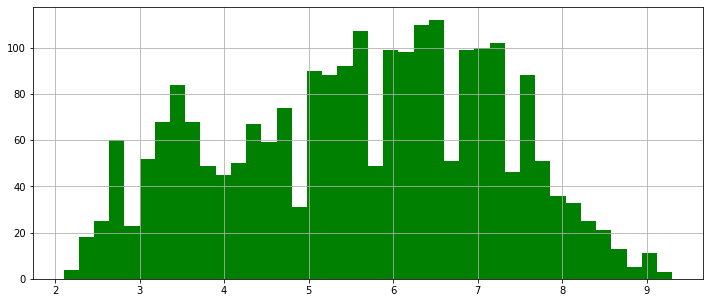

In [3]:
df['豆瓣评分'].hist(grid=True,figsize=(12,5),color='green',bins=40)

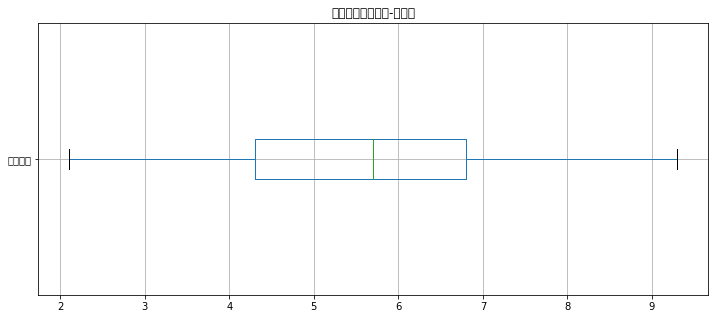

In [4]:
df['豆瓣评分'].plot.box(title='豆瓣评分数据分布-箱形图',grid=True,figsize=(12,5),vert=False)

In [5]:
df['豆瓣评分'].quantile(q=0.25)

4.3

In [6]:
df[df['豆瓣评分']<4.3].count()


电影名称       546
豆瓣评论数      546
豆瓣评分       546
上映日期       497
主演         538
制片国家/地区    546
又名         436
导演         545
片长         494
类型         515
编剧         488
语言         535
r5         546
r4         546
r3         546
r2         546
r1         546
dtype: int64

In [7]:
result_q1=df.sort_values(by='豆瓣评分',ascending=True).iloc[:20]
result_q1.reset_index(inplace=True, drop=True)
result_q1.head(5)

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,渡灵人,176.0,2.1,2016-07-04(中国大陆),王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇,中国大陆,NaN,孔令杭,63分钟,剧情,樊聪,汉语普通话,0.000,0.000,0.024,0.000,0.976
1,白日杀机,131.0,2.2,2015-08-10,张小仟 / 章宇 / 郑诺 / 亦涵,中国大陆,NaN,张帆,62分钟,恐怖,NaN,汉语普通话,0.000,0.000,0.011,0.055,0.934
2,大震撼,210.0,2.2,2011-05-19(中国大陆),石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西,中国大陆,NaN,崔立新,NaN,剧情,NaN,汉语普通话,0.014,0.000,0.000,0.023,0.963
3,戚继光英雄传,794.0,2.2,2012-06-01(中国大陆),NaN,中国大陆,The Legend of The Hero,姚林 / 杨清峰 / 吴鲁光 / 沈丹冶,90分钟,剧情 / 动画 / 传记 / 历史,符利群,汉语普通话,0.027,0.000,0.002,0.004,0.967
4,皇帝的新装之圣诞大明星,114.0,2.3,2016-01-01(中国大陆),NaN,中国大陆,The Emperor’s New Clothes,李霞,78分钟,喜剧 / 动画,NaN,汉语普通话,0.000,0.014,0.029,0.043,0.913


## queston 2

In [8]:
df.dropna(inplace=True, subset=['类型'])
df.reset_index(inplace=True, drop=True)
len(df)

2231

In [58]:
worst_movies = {}
all_movies = {}
for i in df['类型']:
    for j in i.replace(' ',"").split("/"):
        if all_movies.get(j) is not None:
            all_movies[j] += 1
        else:
            all_movies[j] = 1

worst_movies = all_movies.copy()

for i in df[df['豆瓣评分'] >= 4.3]['类型']:
    for j in i.replace(' ',"").split("/"):
        worst_movies[j] -= 1

#print(worst_movies)

{'剧情': 209, '儿童': 19, '动作': 105, '爱情': 209, '战争': 19, '武侠': 16, '古装': 29, '悬疑': 107, '犯罪': 33, '喜剧': 221, '奇幻': 42, '冒险': 40, '短片': 12, '情色': 10, '科幻': 14, '惊悚': 113, '纪录片': 5, '传记': 10, '动画': 34, '同性': 9, '家庭': 14, '恐怖': 41, '真人秀': 0, '黑色电影': 1, '历史': 15, '鬼怪': 2, '音乐': 5, '歌舞': 3, '戏曲': 1, '灾难': 4, '运动': 3, '西部': 0, 'News': 0, '脱口秀': 0, '舞台艺术': 1}


In [66]:
import numpy as np
l2 = list(worst_movies.values())
l1 = list(all_movies.values())

c = [a / b for a, b in zip(l2, l1)] 
a = pd.DataFrame({'lp_pre':c, 'typecount':l2}, index=worst_movies.keys())
print(a.sort_values(by='lp_pre', ascending=False))

        lp_pre  typecount
情色    0.714286         10
恐怖    0.585714         41
惊悚    0.570707        113
鬼怪    0.500000          2
舞台艺术  0.500000          1
悬疑    0.455319        107
科幻    0.451613         14
奇幻    0.432990         42
冒险    0.430108         40
灾难    0.400000          4
喜剧    0.368948        221
爱情    0.361592        209
黑色电影  0.333333          1
动作    0.313433        105
儿童    0.306452         19
歌舞    0.300000          3
犯罪    0.284483         33
动画    0.278689         34
同性    0.264706          9
战争    0.253333         19
运动    0.230769          3
武侠    0.228571         16
传记    0.222222         10
古装    0.213235         29
历史    0.202703         15
剧情    0.201155        209
音乐    0.172414          5
家庭    0.150538         14
戏曲    0.142857          1
短片    0.091603         12
纪录片   0.046729          5
真人秀   0.000000          0
西部    0.000000          0
News  0.000000          0
脱口秀   0.000000          0


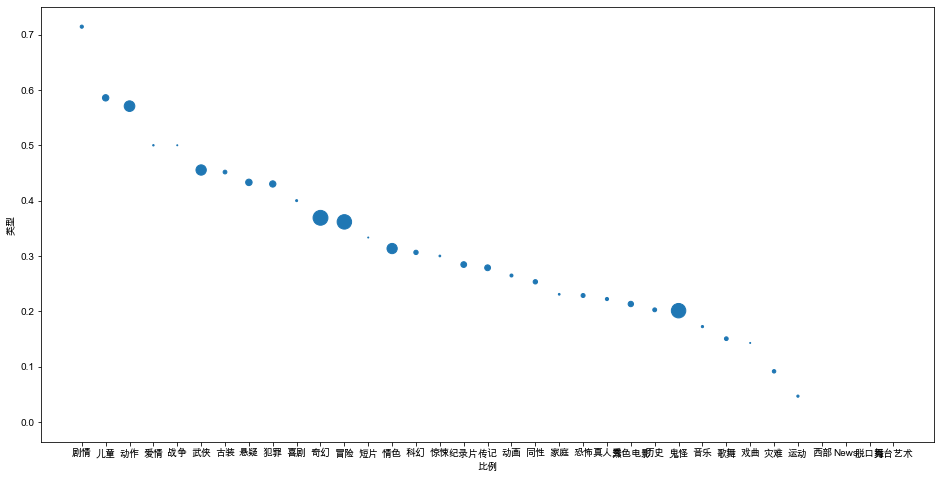

In [85]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

y = a.sort_values(by='lp_pre', ascending=False)
x = worst_movies.keys()

plt.figure(figsize=(16,8))
plt.scatter(x, y['lp_pre'], s=y['typecount'])
plt.xlabel('比例')
plt.ylabel('类型')
plt.show()